In [ ]:
import glob
import os
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

caminho_arquivos = 'C:/Users/Leticia/Documents/UNIP/4º SEMESTRE/APS/datasets/focos_incendios/*.csv'
lista_arquivos = glob.glob(caminho_arquivos)

dfs = [pd.read_csv(arquivo) for arquivo in lista_arquivos if not pd.read_csv(arquivo).empty]
df_total = pd.concat(dfs, ignore_index=True)

incendios_batatais = df_total[df_total['municipio'].str.contains('Batatais', case=False)]
incendios_batatais['data_hora_gmt'] = pd.to_datetime(incendios_batatais['data_hora_gmt'], format='%Y-%m-%d %H:%M:%S')

gdf_incendios = gpd.GeoDataFrame(
    incendios_batatais, 
    geometry=gpd.points_from_xy(incendios_batatais['lon'], incendios_batatais['lat']), 
    crs="EPSG:4326"
)

gdf_sigef = gpd.read_file('C:/Users/Leticia/Documents/UNIP/4º SEMESTRE/APS/datasets/Sigef_Privado_SP/Sigef Privado_SP.shp')
gdf_snci = gpd.read_file('C:/Users/Leticia/Documents/UNIP/4º SEMESTRE/APS/datasets/Imovel_certificado_SNCI_Privado_SP/Imóvel certificado SNCI Privado_SP.shp')
gdf_propriedades = gpd.GeoDataFrame(pd.concat([gdf_sigef, gdf_snci], ignore_index=True))

gdf_incendios.head(), gdf_propriedades.head()

(                                     id       lat       lon  \
 0  62ef0e63-973d-3c74-9bf5-7694be6927db -20.87682 -47.73276   
 1  ae94e1a0-15e0-314e-800c-47e734ea8910 -21.01139 -47.52601   
 2  9d236858-76be-3a0a-a097-c177e4d35b4d -21.01130 -47.52679   
 3  780fa98d-72b4-30ca-a801-47a580b20611 -20.87606 -47.61278   
 4  93287c49-c735-329e-9251-1f25db31888f -20.88074 -47.64296   
 
         data_hora_gmt   satelite municipio     estado    pais  municipio_id  \
 0 2024-02-29 17:43:00   AQUA_M-T  BATATAIS  SÃO PAULO  Brasil       3505906   
 1 2024-03-04 16:28:00    NOAA-20  BATATAIS  SÃO PAULO  Brasil       3505906   
 2 2024-03-12 17:17:00    NOAA-20  BATATAIS  SÃO PAULO  Brasil       3505906   
 3 2024-04-20 03:53:00    NOAA-20  BATATAIS  SÃO PAULO  Brasil       3505906   
 4 2024-04-25 12:59:00  TERRA_M-T  BATATAIS  SÃO PAULO  Brasil       3505906   
 
    estado_id  pais_id  numero_dias_sem_chuva  precipitacao  risco_fogo  \
 0         35       33                      5          0.

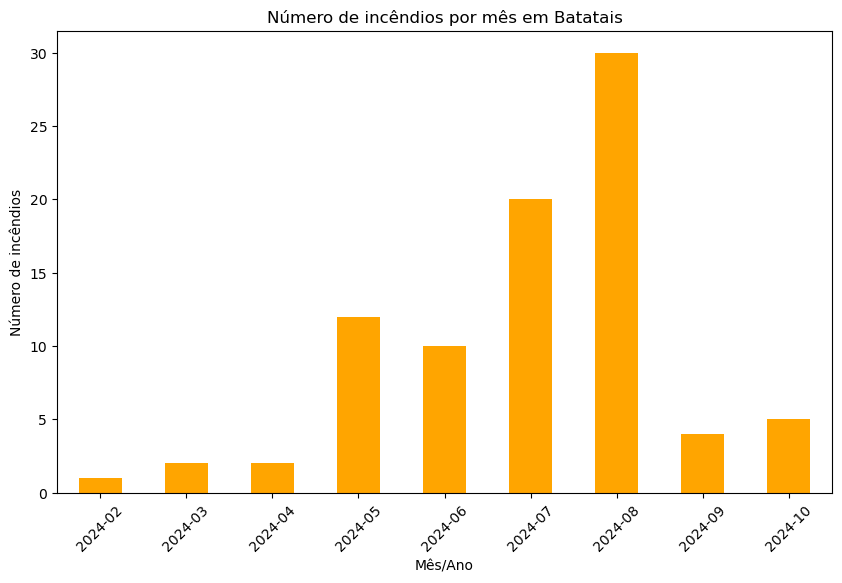

In [2]:
incendios_batatais['mes_ano'] = incendios_batatais['data_hora_gmt'].dt.to_period('M')
incendios_por_mes = incendios_batatais.groupby('mes_ano').size()

incendios_por_mes.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Número de incêndios por mês em Batatais")
plt.xlabel("Mês/Ano")
plt.ylabel("Número de incêndios")
plt.xticks(rotation=45)
plt.show()

In [3]:
import glob
import os
import plotly.express as px
import geopandas as gpd
import pandas as pd

caminho_arquivos = 'C:/Users/Leticia/Documents/UNIP/4º SEMESTRE/APS/Teste-03/datasets/focos_incendios/*.csv'

lista_arquivos = glob.glob(caminho_arquivos)

df_total = pd.concat([pd.read_csv(arquivo) for arquivo in lista_arquivos], ignore_index=True)

incendios_batatais = df_total[df_total['municipio'].str.contains('Batatais', case=False)]

incendios_batatais['data_hora_gmt'] = pd.to_datetime(incendios_batatais['data_hora_gmt'], format='%Y-%m-%d %H:%M:%S')

gdf_incendios = gpd.GeoDataFrame(incendios_batatais, geometry=gpd.points_from_xy(incendios_batatais['lon'], incendios_batatais['lat']), crs="EPSG:4326")

gdf_sigef = gpd.read_file('C:/Users/Leticia/Documents/UNIP/4º SEMESTRE/APS/Teste-03/datasets/Sigef_Privado_SP/Sigef Privado_SP.shp')
gdf_snci = gpd.read_file('C:/Users/Leticia/Documents/UNIP/4º SEMESTRE/APS/Teste-03/datasets/Imovel_certificado_SNCI_Privado_SP/Imóvel certificado SNCI Privado_SP.shp')

gdf_propriedades = gpd.GeoDataFrame(pd.concat([gdf_sigef, gdf_snci], ignore_index=True))

gdf_propriedades['centroid'] = gdf_propriedades.geometry.centroid
gdf_propriedades['x'] = gdf_propriedades['centroid'].x
gdf_propriedades['y'] = gdf_propriedades['centroid'].y

start_date = '2024-01-01'
end_date = '2024-12-31'

incendios_filtrados = gdf_incendios[(gdf_incendios['data_hora_gmt'] >= start_date) & (gdf_incendios['data_hora_gmt'] <= end_date)]

incendios_propriedades = gpd.sjoin(incendios_filtrados, gdf_propriedades, how='left', predicate='within')

incendios_propriedades['propriedade'] = incendios_propriedades['nome_area'] 

incendios_por_propriedade = incendios_propriedades.groupby('propriedade').size().reset_index(name='num_incendios')

fig2 = px.bar(incendios_por_propriedade, x='propriedade', y='num_incendios', title="Distribuição de Incêndios por Propriedade")

fig2.show()

C:\Users\Leticia\AppData\Local\Temp\ipykernel_28344\3852243316.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_total = pd.concat([pd.read_csv(arquivo) for arquivo in lista_arquivos], ignore_index=True)
C:\Users\Leticia\AppData\Local\Temp\ipykernel_28344\3852243316.py:33: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  incendios_propriedades = gpd.sjoin(incendios_filtrados, gdf_propriedades, how='left', predicate='within')


In [4]:
resumo_incendios = incendios_propriedades.groupby('propriedade').agg(
    total_incendios=('id', 'count'),
    frp_medio=('frp', 'mean'),
    risco_fogo_medio=('risco_fogo', 'mean'),
    dias_sem_chuva_medio=('numero_dias_sem_chuva', 'mean'),
    precipitacao_media=('precipitacao', 'mean')
).reset_index()

import plotly.express as px
fig_resumo = px.bar(resumo_incendios, x='propriedade', y='total_incendios', title="Total de Incêndios por Propriedade")
fig_resumo.show()

resumo_incendios

,propriedade,total_incendios,frp_medio,risco_fogo_medio,dias_sem_chuva_medio,precipitacao_media
0,FAZENDA BOM JESUS GLEBA A,1,2.50,1.00,22.0,0.00
1,FAZENDA CABECEIRA DO BREJO DOS VEADOS,1,13.30,1.00,23.0,0.00
2,FAZENDA COLORADO,2,9.55,0.02,1.5,4.73
3,FAZENDA SANTA TEREZA DA PRATA,5,70.92,1.00,25.0,0.00
4,FAZENDA SUCUPIRA,1,0.60,1.00,68.0,0.00
5,FAZENDA VENTANIA,1,0.80,1.00,23.0,0.20
6,FAZENDA VOLTA GRANDE,1,165.30,1.00,11.0,0.00
7,SITIO CÓRREGO DO ESTREITO,1,12.50,0.32,5.0,0.00
8,SITIO GUARUJA,1,134.60,1.00,11.0,0.00
9,SITIO SÃO JOSE,1,NaN,1.00,27.0,0.00


In [5]:
tabela_hash = {}

for idx, linha in incendios_propriedades.iterrows():
    propriedade = linha['propriedade']
    if propriedade not in tabela_hash:
        tabela_hash[propriedade] = []
    tabela_hash[propriedade].append({
        'id': linha['id'],
        'lat': linha['lat'],
        'lon': linha['lon'],
        'data_hora_gmt': linha['data_hora_gmt'],
        'satelite': linha['satelite'],
        'municipio': linha['municipio'],
        'estado': linha['estado'],
        'pais': linha['pais'],
        'numero_dias_sem_chuva': linha['numero_dias_sem_chuva'],
        'precipitacao': linha['precipitacao'],
        'risco_fogo': linha['risco_fogo'],
        'bioma': linha['bioma'],
        'frp': linha['frp']
    })

for propriedade, incendios in tabela_hash.items():
    print(f"Propriedade: {propriedade}")
    for incendio in incendios:
        print(f"  Município: {incendio['municipio']}, Data/Hora: {incendio['data_hora_gmt']}, FRP: {incendio['frp']}, Risco de Fogo: {incendio['risco_fogo']}, Num. Dias sem Chuva: {incendio['numero_dias_sem_chuva']}, Precipitação: {incendio['precipitacao']}, Bioma: {incendio['bioma']}")

Propriedade: SITIO CÓRREGO DO ESTREITO
  Município: BATATAIS, Data/Hora: 2024-02-29 17:43:00, FRP: 12.5, Risco de Fogo: 0.32, Num. Dias sem Chuva: 5, Precipitação: 0.0, Bioma: Cerrado
Propriedade: FAZENDA COLORADO
  Município: BATATAIS, Data/Hora: 2024-03-04 16:28:00, FRP: 7.3, Risco de Fogo: 0.02, Num. Dias sem Chuva: 1, Precipitação: 9.46, Bioma: Cerrado
  Município: BATATAIS, Data/Hora: 2024-03-12 17:17:00, FRP: 11.8, Risco de Fogo: 0.02, Num. Dias sem Chuva: 2, Precipitação: 0.0, Bioma: Cerrado
Propriedade: nan
  Município: BATATAIS, Data/Hora: 2024-04-20 03:53:00, FRP: 1.7, Risco de Fogo: 0.3, Num. Dias sem Chuva: 2, Precipitação: 0.0, Bioma: Cerrado
  Município: BATATAIS, Data/Hora: 2024-04-25 12:59:00, FRP: 14.3, Risco de Fogo: 0.8, Num. Dias sem Chuva: 7, Precipitação: 0.0, Bioma: Cerrado
  Município: BATATAIS, Data/Hora: 2024-05-08 16:35:00, FRP: 2.6, Risco de Fogo: -999.0, Num. Dias sem Chuva: 20, Precipitação: 0.0, Bioma: Cerrado
  Município: BATATAIS, Data/Hora: 2024-05-10 

In [6]:
for propriedade, incendios in tabela_hash.items():
    print(f"\nPropriedade: {propriedade}\n{'-'*50}")
    for incendio in incendios:
        print(f"ID: {incendio['id']}")
        print(f"Data/Hora: {incendio['data_hora_gmt']}")
        print(f"Risco de Fogo: {incendio['risco_fogo']}")
        print(f"FRP: {incendio['frp']}")
        print(f"Bioma: {incendio['bioma']}")
        print(f"Município: {incendio['municipio']}")
        print(f"Dia(s) sem Chuva: {incendio['numero_dias_sem_chuva']}")
        print(f"Precipitação: {incendio['precipitacao']}\n")
        print('-' * 50)


Propriedade: SITIO CÓRREGO DO ESTREITO
--------------------------------------------------
ID: 62ef0e63-973d-3c74-9bf5-7694be6927db
Data/Hora: 2024-02-29 17:43:00
Risco de Fogo: 0.32
FRP: 12.5
Bioma: Cerrado
Município: BATATAIS
Dia(s) sem Chuva: 5
Precipitação: 0.0

--------------------------------------------------

Propriedade: FAZENDA COLORADO
--------------------------------------------------
ID: ae94e1a0-15e0-314e-800c-47e734ea8910
Data/Hora: 2024-03-04 16:28:00
Risco de Fogo: 0.02
FRP: 7.3
Bioma: Cerrado
Município: BATATAIS
Dia(s) sem Chuva: 1
Precipitação: 9.46

--------------------------------------------------
ID: 9d236858-76be-3a0a-a097-c177e4d35b4d
Data/Hora: 2024-03-12 17:17:00
Risco de Fogo: 0.02
FRP: 11.8
Bioma: Cerrado
Município: BATATAIS
Dia(s) sem Chuva: 2
Precipitação: 0.0

--------------------------------------------------

Propriedade: nan
--------------------------------------------------
ID: 780fa98d-72b4-30ca-a801-47a580b20611
Data/Hora: 2024-04-20 03:53:00
Risco

In [ ]:
class NoArvore:
    def __init__(self, chave, valor):
        self.esquerda = None
        self.direita = None
        self.chave = chave  # pontuação de risco
        self.valor = valor  # dados do incêndio
        self.altura = 1 

def altura(no):
    if no is None:
        return 0
    return no.altura

def fator_balanceamento(no):
    if no is None:
        return 0
    return altura(no.esquerda) - altura(no.direita)

def rotacao_direita(y):
    x = y.esquerda
    T2 = x.direita

    x.direita = y
    y.esquerda = T2

    y.altura = 1 + max(altura(y.esquerda), altura(y.direita))
    x.altura = 1 + max(altura(x.esquerda), altura(x.direita))

    return x

def rotacao_esquerda(x):
    y = x.direita
    T2 = y.esquerda

    y.esquerda = x
    x.direita = T2

    x.altura = 1 + max(altura(x.esquerda), altura(x.direita))
    y.altura = 1 + max(altura(y.esquerda), altura(y.direita))

    return y

def inserir(raiz, chave, valor):
    if raiz is None:
        return NoArvore(chave, valor)
    if chave < raiz.chave:
        raiz.esquerda = inserir(raiz.esquerda, chave, valor)
    else:
        raiz.direita = inserir(raiz.direita, chave, valor)

    raiz.altura = 1 + max(altura(raiz.esquerda), altura(raiz.direita))

    balanceamento = fator_balanceamento(raiz)

    if balanceamento > 1 and chave < raiz.esquerda.chave:
        return rotacao_direita(raiz)

    if balanceamento < -1 and chave > raiz.direita.chave:
        return rotacao_esquerda(raiz)

    if balanceamento > 1 and chave > raiz.esquerda.chave:
        raiz.esquerda = rotacao_esquerda(raiz.esquerda)
        return rotacao_direita(raiz)

    if balanceamento < -1 and chave < raiz.direita.chave:
        raiz.direita = rotacao_direita(raiz.direita)
        return rotacao_esquerda(raiz)

    return raiz

def percorrer_em_ordem(raiz, resultado=None):
    if resultado is None:
        resultado = []
    if raiz:
        percorrer_em_ordem(raiz.esquerda, resultado)
        resultado.append(raiz.valor)
        percorrer_em_ordem(raiz.direita, resultado)
    return resultado

raiz = None
for idx, linha in incendios_propriedades.iterrows():
    if pd.notna(linha['propriedade']):
        raiz = inserir(raiz, linha['risco_fogo'], linha)

incendios_ordenados = percorrer_em_ordem(raiz)

for incendio in incendios_ordenados:
    if pd.notna(incendio['propriedade']):
        print(f"Propriedade: {incendio['propriedade']}, ID do incêndio: {incendio['id']}, Risco de Fogo: {incendio['risco_fogo']}, Data/Hora: {incendio['data_hora_gmt']}")

Propriedade: FAZENDA COLORADO, ID do incêndio: ae94e1a0-15e0-314e-800c-47e734ea8910, Risco de Fogo: 0.02, Data/Hora: 2024-03-04 16:28:00
Propriedade: FAZENDA COLORADO, ID do incêndio: 9d236858-76be-3a0a-a097-c177e4d35b4d, Risco de Fogo: 0.02, Data/Hora: 2024-03-12 17:17:00
Propriedade: SITIO CÓRREGO DO ESTREITO, ID do incêndio: 62ef0e63-973d-3c74-9bf5-7694be6927db, Risco de Fogo: 0.32, Data/Hora: 2024-02-29 17:43:00
Propriedade: FAZENDA BOM JESUS  GLEBA A, ID do incêndio: a1e69233-c5c7-35f9-97d2-cf4e83b38f08, Risco de Fogo: 1.0, Data/Hora: 2024-05-10 03:25:00
Propriedade: FAZENDA CABECEIRA DO BREJO DOS VEADOS, ID do incêndio: 04355e8c-2185-3c29-bf6d-3e4b3c724eeb, Risco de Fogo: 1.0, Data/Hora: 2024-05-11 17:17:00
Propriedade: SÍTIO SANTO ANTONIO, ID do incêndio: 4c838524-cb11-3cb9-9ffb-77f35cc473aa, Risco de Fogo: 1.0, Data/Hora: 2024-06-07 17:11:00
Propriedade: SÍTIO CONSERVA E SÍTIO SÃO SEBASTIÃO, ID do incêndio: d13a1ee9-4b0c-3318-8c25-9a2b6d29e168, Risco de Fogo: 1.0, Data/Hora: 20

In [30]:
def classificar_risco_propriedade(row):
    if row['total_incendios'] > 5 or row['frp_medio'] > 50 or row['risco_fogo_medio'] > 0.5:
        return 'Alto'
    elif row['total_incendios'] > 2 or row['frp_medio'] > 20 or row['risco_fogo_medio'] > 0.2:
        return 'Médio'
    else:
        return 'Baixo'

resumo_incendios['Risco'] = resumo_incendios.apply(classificar_risco_propriedade, axis=1)

print(resumo_incendios)

                              propriedade  total_incendios  frp_medio  \
0              FAZENDA BOM JESUS  GLEBA A                1       2.50   
1   FAZENDA CABECEIRA DO BREJO DOS VEADOS                1      13.30   
2                        FAZENDA COLORADO                2       9.55   
3           FAZENDA SANTA TEREZA DA PRATA                5      70.92   
4                        FAZENDA SUCUPIRA                1       0.60   
5                        FAZENDA VENTANIA                1       0.80   
6                    FAZENDA VOLTA GRANDE                1     165.30   
7               SITIO CÓRREGO DO ESTREITO                1      12.50   
8                           SITIO GUARUJA                1     134.60   
9                          SITIO SÃO JOSE                1        NaN   
10   SÍTIO CONSERVA E SÍTIO SÃO SEBASTIÃO                1        NaN   
11                       SÍTIO LARANJEIRA                1       1.00   
12                     SÍTIO OLHOS D ÁGUA          

In [31]:
import plotly.express as px

fig_risco = px.bar(resumo_incendios, x='propriedade', y='total_incendios', color='Risco', title="Classificação de risco de incêndios por propriedade")

fig_risco.show()

In [33]:
import plotly.express as px

resumo_incendios_ordenado = resumo_incendios.sort_values(by='total_incendios', ascending=False)

colors = {
    'Baixo': '#FECB52',
    'Médio': '#FFA15A',
    'Alto': '#EF553B'
}

fig_pizza_riscos = px.pie(
    resumo_incendios,
    names='Risco',
    values='total_incendios',
    color='Risco',
    color_discrete_map=colors,
    title="Distribuição de riscos de fogo"
)
fig_pizza_riscos.show()

In [34]:
import plotly.express as px

quantidade_risco = resumo_incendios['Risco'].value_counts().reset_index()
quantidade_risco.columns = ['Risco', 'Quantidade']

fig_risco_quantidade = px.bar(
    quantidade_risco,
    x='Risco',
    y='Quantidade',
    color='Risco',
    color_discrete_map=colors,
    title="Quantidade de Risco de Fogo por Classificação"
)

fig_risco_quantidade.show()

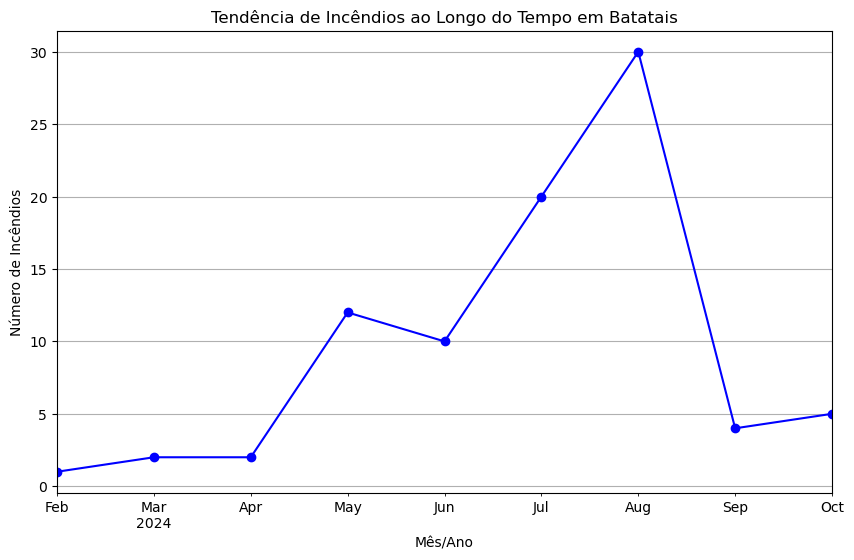

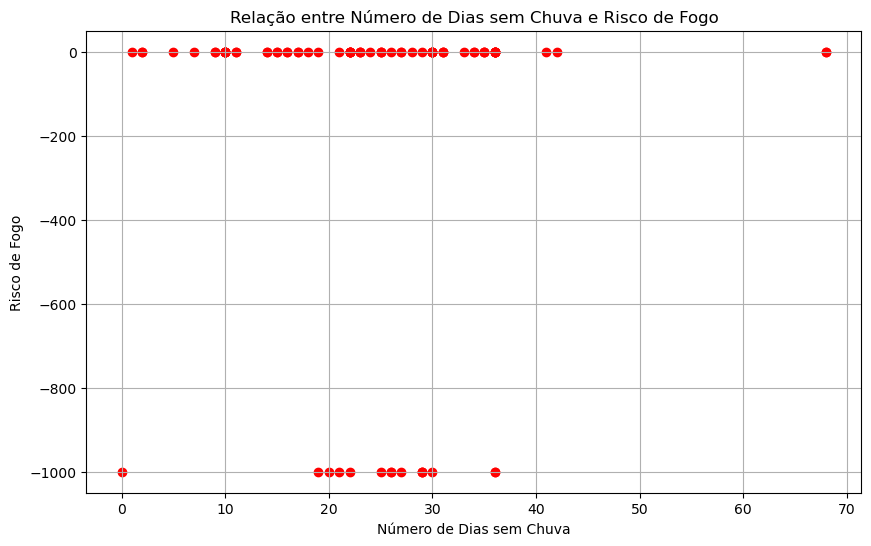

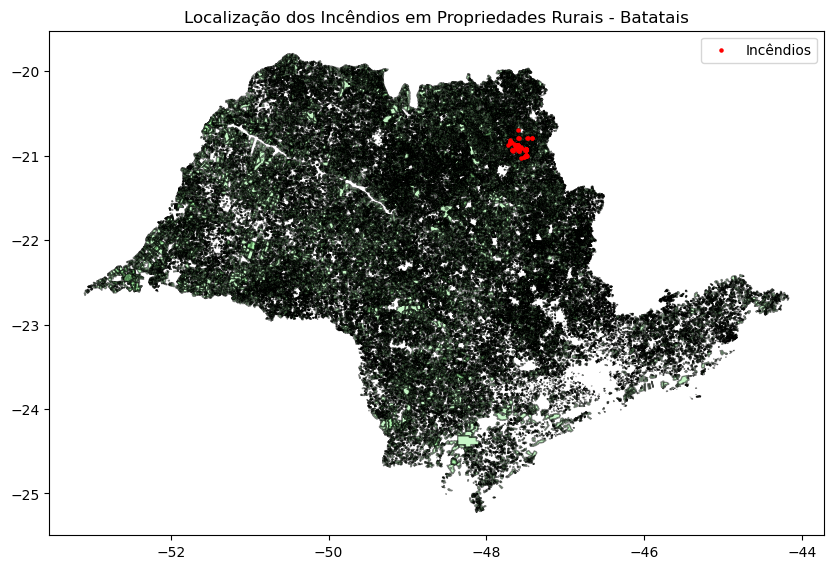

In [ ]:
# Gráfico de linha para mostrar a tendência de incêndios ao longo do tempo
incendios_por_mes.plot(kind='line', figsize=(10, 6), color='blue', marker='o')
plt.title("Tendência de Incêndios ao Longo do Tempo em Batatais")
plt.xlabel("Mês/Ano")
plt.ylabel("Número de Incêndios")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gráfico de dispersão para visualizar a relação entre o número de dias sem chuva e o risco de fogo
plt.figure(figsize=(10, 6))
plt.scatter(incendios_batatais['numero_dias_sem_chuva'], incendios_batatais['risco_fogo'], color='red')
plt.title("Relação entre Número de Dias sem Chuva e Risco de Fogo")
plt.xlabel("Número de Dias sem Chuva")
plt.ylabel("Risco de Fogo")
plt.grid(True)
plt.show()

# Gráfico de mapa para mostrar a localização dos incêndios
fig, ax = plt.subplots(figsize=(10, 10))
gdf_propriedades.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.5)
gdf_incendios.plot(ax=ax, color='red', markersize=5, label='Incêndios')
plt.legend()
plt.title("Localização dos Incêndios em Propriedades Rurais - Batatais")
plt.show()

In [17]:
# Gráfico de barras para mostrar a distribuição dos incêndios por satélite
incendios_por_satelite = incendios_batatais['satelite'].value_counts()
fig_satelite = px.bar(
    incendios_por_satelite,
    x=incendios_por_satelite.index,
    y=incendios_por_satelite.values,
    title="Distribuição de Incêndios por Satélite",
    labels={'x': 'Satélite', 'y': 'Número de Incêndios'}
)
fig_satelite.show()

# Gráfico de dispersão para visualizar a relação entre a precipitação e o risco de fogo
fig_precipitacao_risco = px.scatter(
    incendios_batatais,
    x='precipitacao',
    y='risco_fogo',
    title="Relação entre Precipitação e Risco de Fogo",
    labels={'precipitacao': 'Precipitação (mm)', 'risco_fogo': 'Risco de Fogo'}
)
fig_precipitacao_risco.show()

# Gráfico de barras para mostrar a distribuição dos incêndios por bioma
incendios_por_bioma = incendios_batatais['bioma'].value_counts()
fig_bioma = px.bar(
    incendios_por_bioma,
    x=incendios_por_bioma.index,
    y=incendios_por_bioma.values,
    title="Distribuição de Incêndios por Bioma",
    labels={'x': 'Bioma', 'y': 'Número de Incêndios'}
)
fig_bioma.show()

In [18]:
# Gráfico de barras para mostrar a distribuição dos incêndios por estado
incendios_por_estado = incendios_batatais['estado'].value_counts()
fig_estado = px.bar(
    incendios_por_estado,
    x=incendios_por_estado.index,
    y=incendios_por_estado.values,
    title="Distribuição de Incêndios por Estado",
    labels={'x': 'Estado', 'y': 'Número de Incêndios'}
)
fig_estado.show()

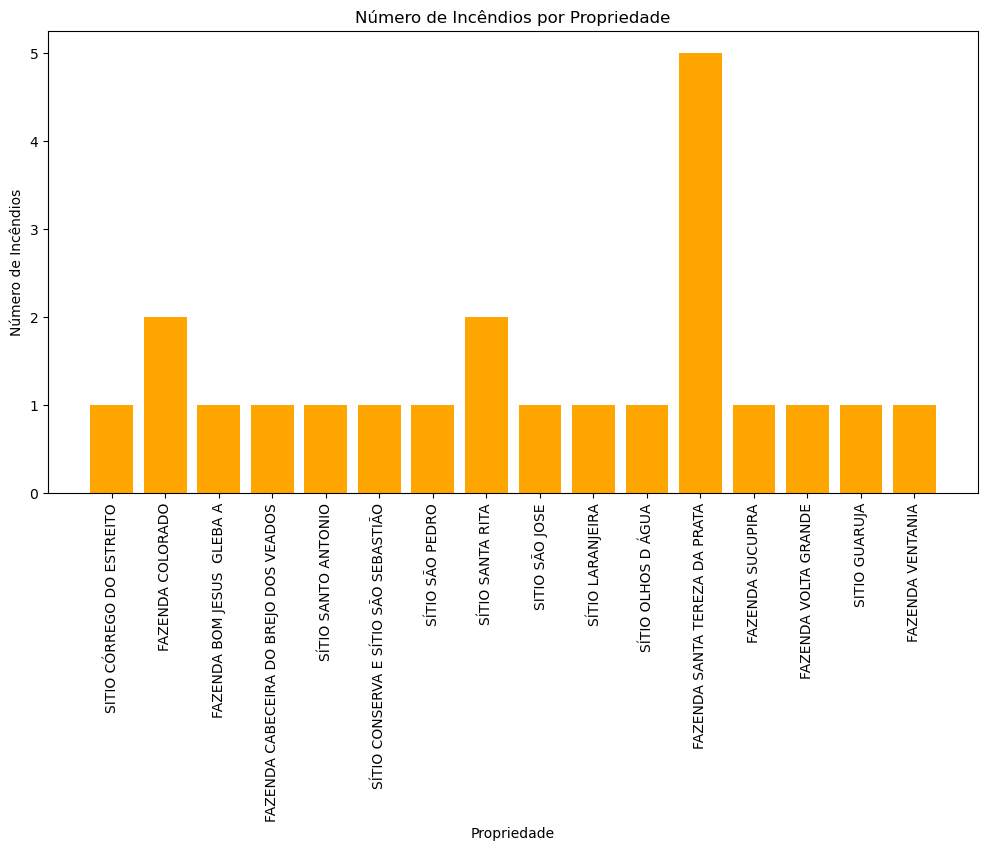

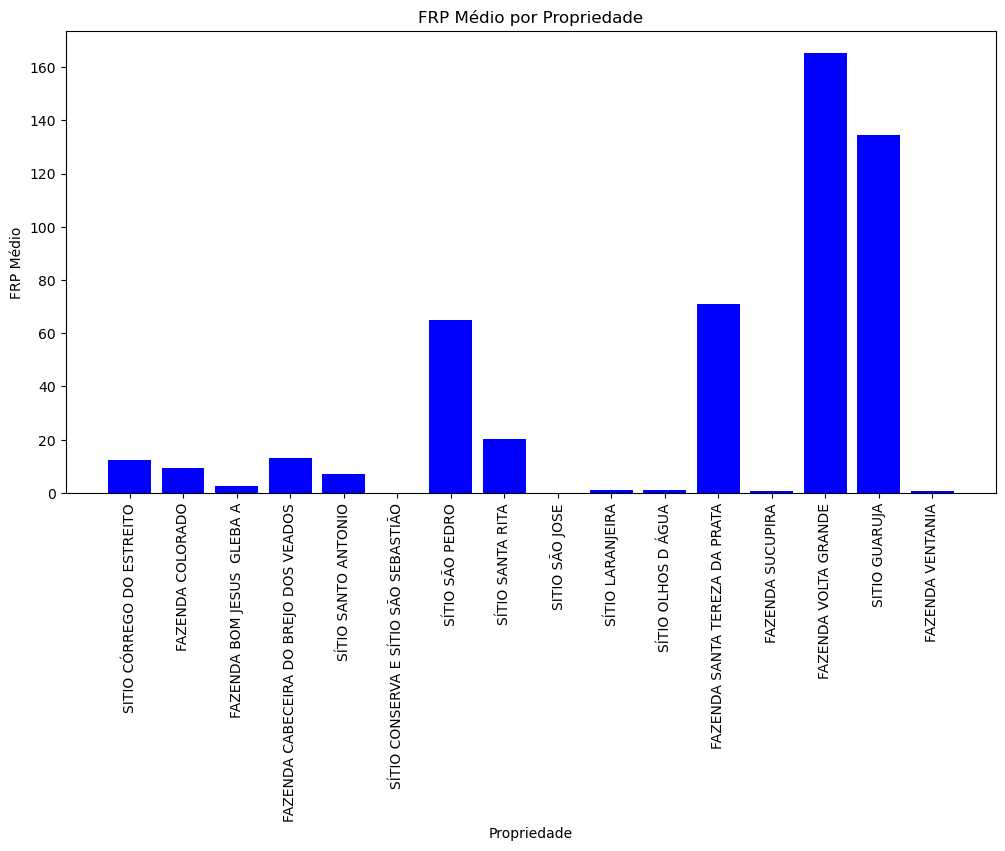

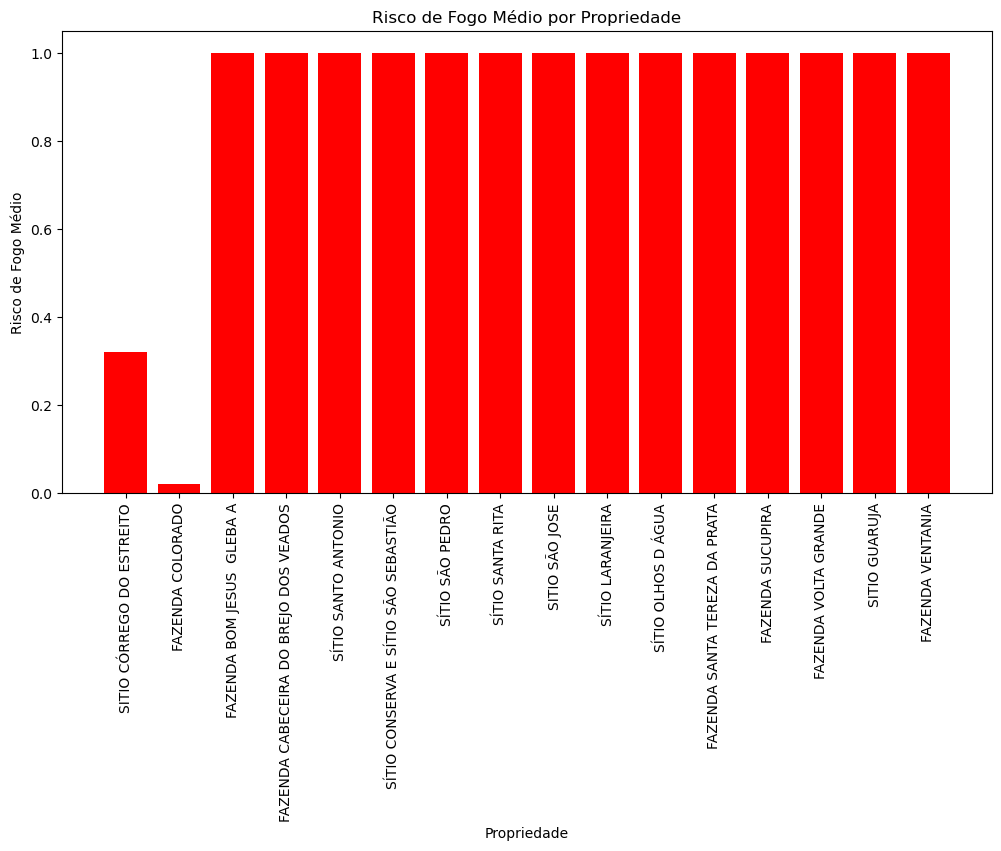

In [37]:
import matplotlib.pyplot as plt

propriedades = [str(prop) for prop in tabela_hash.keys() if str(prop) != 'nan']

num_incendios = [len(tabela_hash[prop]) for prop in propriedades]
frp_medio = [sum(incendio['frp'] for incendio in tabela_hash[prop] if incendio['frp'] is not None) / len(tabela_hash[prop]) for prop in propriedades]
risco_fogo_medio = [sum(incendio['risco_fogo'] for incendio in tabela_hash[prop]) / len(tabela_hash[prop]) for prop in propriedades]

plt.figure(figsize=(12, 6))
plt.bar(propriedades, num_incendios, color='orange')
plt.xlabel('Propriedade')
plt.ylabel('Número de Incêndios')
plt.title('Número de Incêndios por Propriedade')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(propriedades, frp_medio, color='blue')
plt.xlabel('Propriedade')
plt.ylabel('FRP Médio')
plt.title('FRP Médio por Propriedade')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(propriedades, risco_fogo_medio, color='red')
plt.xlabel('Propriedade')
plt.ylabel('Risco de Fogo Médio')
plt.title('Risco de Fogo Médio por Propriedade')
plt.xticks(rotation=90)
plt.show()

In [38]:
import plotly.graph_objects as go

propriedades = [str(prop) for prop in tabela_hash.keys() if str(prop) != 'nan']

num_incendios = [len(tabela_hash[prop]) for prop in propriedades]
frp_medio = [sum(incendio['frp'] for incendio in tabela_hash[prop] if incendio['frp'] is not None) / len(tabela_hash[prop]) for prop in propriedades]
risco_fogo_medio = [sum(incendio['risco_fogo'] for incendio in tabela_hash[prop]) / len(tabela_hash[prop]) for prop in propriedades]

fig1 = go.Figure(data=[
    go.Bar(x=propriedades, y=num_incendios, marker_color='orange')
])
fig1.update_layout(
    title='Número de Incêndios por Propriedade',
    xaxis_title='Propriedade',
    yaxis_title='Número de Incêndios',
    xaxis_tickangle=-90
)
fig1.show()

fig2 = go.Figure(data=[
    go.Bar(x=propriedades, y=frp_medio, marker_color='blue')
])
fig2.update_layout(
    title='FRP Médio por Propriedade',
    xaxis_title='Propriedade',
    yaxis_title='FRP Médio',
    xaxis_tickangle=-90
)
fig2.show()

fig3 = go.Figure(data=[
    go.Bar(x=propriedades, y=risco_fogo_medio, marker_color='red')
])
fig3.update_layout(
    title='Risco de Fogo Médio por Propriedade',
    xaxis_title='Propriedade',
    yaxis_title='Risco de Fogo Médio',
    xaxis_tickangle=-90
)
fig3.show()

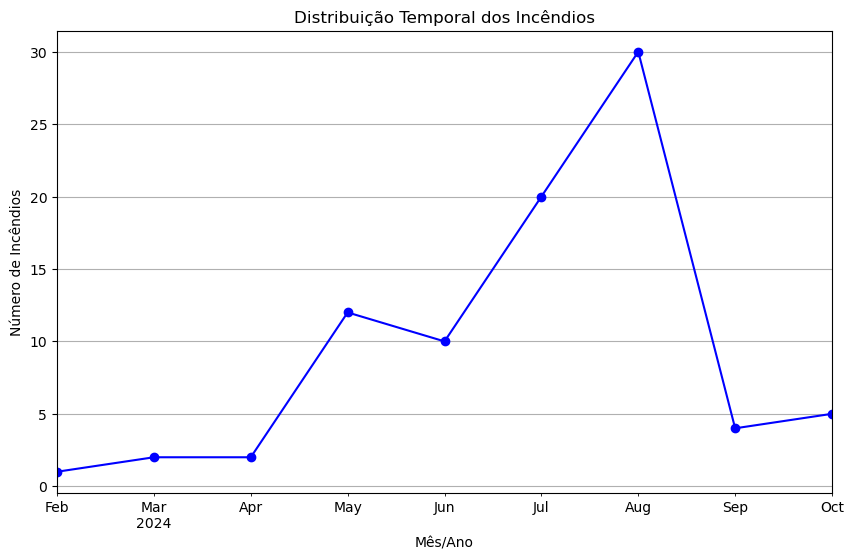

In [40]:
import matplotlib.pyplot as plt
import plotly.express as px

plt.figure(figsize=(10, 6))
incendios_por_mes.plot(kind='line', marker='o', color='blue')
plt.title("Distribuição Temporal dos Incêndios")
plt.xlabel("Mês/Ano")
plt.ylabel("Número de Incêndios")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

gdf_propriedades['tamanho'] = gdf_propriedades.geometry.area

incendios_tamanho = incendios_propriedades.groupby('propriedade').size().reset_index(name='num_incendios')
incendios_tamanho = incendios_tamanho.merge(gdf_propriedades[['nome_area', 'tamanho']], left_on='propriedade', right_on='nome_area')

fig_tamanho = px.scatter(incendios_tamanho, x='tamanho', y='num_incendios', title="Relação entre o Tamanho da Propriedade e a Frequência de Incêndios")
fig_tamanho.show()